<a href="https://colab.research.google.com/github/nilamaula26/Praktikum-Kuliah/blob/main/Rencana%20Skripsi%20K-Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.metrics import silhouette_score

rfm = pd.read_excel("rfm.xlsx")

In [2]:
rfm.describe()

,recency,frequency,monetary
count,9010.000000,9010.000000,9.010000e+03
mean,403.223196,1.453163,1.530155e+05
std,235.846518,1.158383,2.088286e+05
min,1.000000,1.000000,2.000000e+04
25%,208.000000,1.000000,8.000000e+04
50%,393.000000,1.000000,1.090000e+05
75%,573.000000,2.000000,1.450000e+05
max,1307.000000,29.000000,4.390000e+06


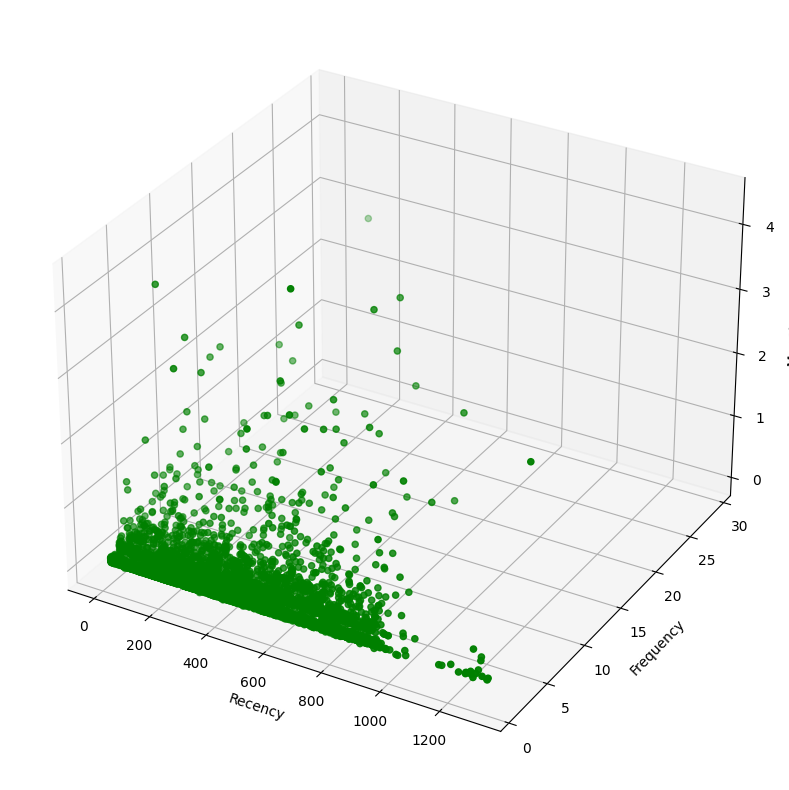

In [3]:
# Membuat data acak
x = rfm['recency']  # Assuming 'recency' is the first column
y = rfm['frequency']  # Assuming 'frequency' is the second column
z = rfm['monetary']  # Assuming 'monetary' is the third column

# Membuat figure
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection="3d")

# Membuat scatter plot
ax.scatter3D(x, y, z, color="green")
ax.set_title("Titik Sebaran Data")
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary")
plt.savefig("data.png", format='png')
# Menampilkan plot
plt.show()

In [4]:
# Standarisasi fitur
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)


In [5]:
# Menggunakan len() untuk menghitung jumlah data
jumlah_data = len(rfm_scaled)

print("Jumlah data:", jumlah_data)

Jumlah data: 9010


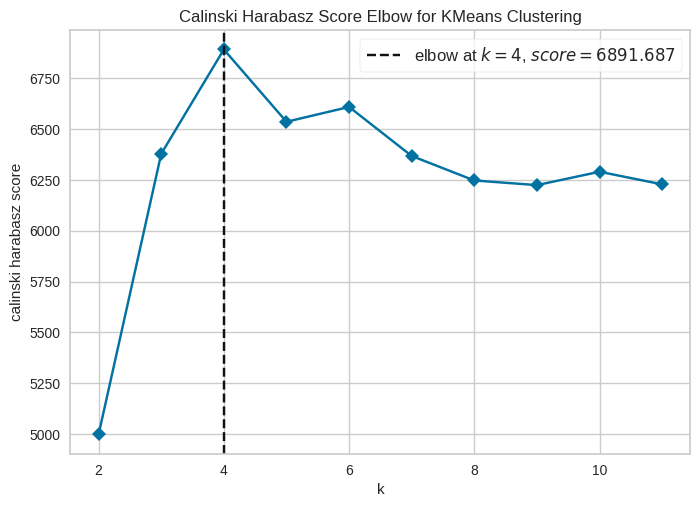

<Figure size 800x550 with 0 Axes>

In [7]:
# from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Ganti X dengan dataset rfm_scaled
X = rfm_scaled

# Instantiate the clustering model and visualizer
model = KMeans(n_init=10)
visualizer = KElbowVisualizer(
    model, k=(2,12), metric='calinski_harabasz', timings=False
)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure
plt.savefig("CH.png", format='png')

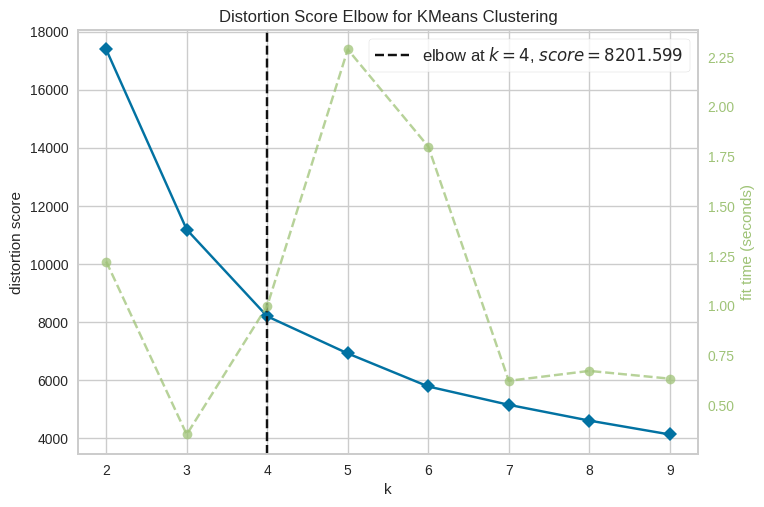

<Figure size 800x550 with 0 Axes>

In [8]:
from yellowbrick.cluster.elbow import kelbow_visualizer

X = rfm_scaled

# Use the quick method and immediately show the figure
kelbow_visualizer(KMeans(random_state=4, n_init=10), X, k=(2,10))
plt.savefig("elbow.png", format='png')

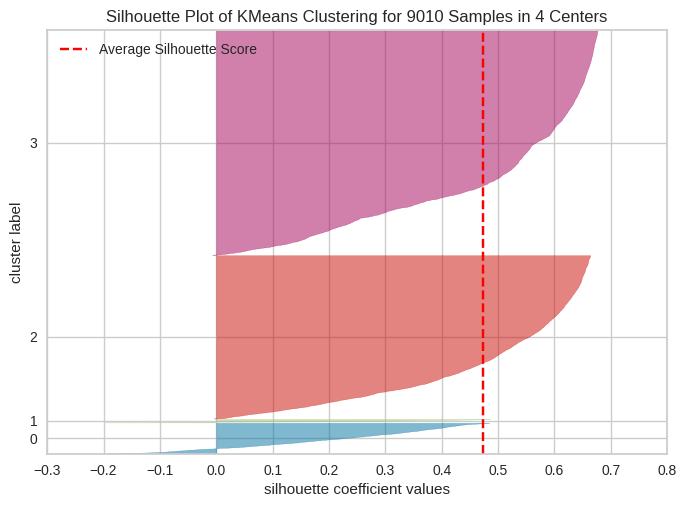

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 9010 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [17]:
from yellowbrick.cluster import SilhouetteVisualizer
# Instantiate the clustering model and visualizer
model = KMeans(4, random_state=42, n_init=10)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figur

In [10]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10).fit(rfm_scaled)

labels = kmeans.labels_

# Get the coordinates of the cluster centers
cluster_centers = kmeans.cluster_centers_

print("Labels:", labels)
print("Cluster Centers:", cluster_centers)

Labels: [1 0 1 ... 0 0 0]
Cluster Centers: [[-0.71885084 -0.19777492 -0.21051494]
 [ 0.98816347 -0.23646021 -0.15835178]
 [ 0.17989584  6.65533559  8.2797288 ]
 [-0.02845939  1.96798682  1.45816068]]


In [11]:
cluster_counts = Counter(labels)

print(cluster_counts)

Counter({0: 4793, 1: 3492, 3: 651, 2: 74})


In [12]:
from sklearn.metrics import davies_bouldin_score
km_ss = silhouette_score(rfm_scaled, labels)
km_db = davies_bouldin_score(rfm_scaled, labels)
print("K-Means Silhouette Score: ", km_ss)
print("K-Means Davies-Bouldin Score: ", km_db)

K-Means Silhouette Score:  0.47308604931999937
K-Means Davies-Bouldin Score:  0.7650020748556745


In [13]:
label_mapping = {
    0: 'Cluster 1',
    1: 'Cluster 2',
    2: 'Cluster 3',
    3: 'Cluster 4'
}

# Ubah label dengan mapping yang telah dibuat
new_labels = [label_mapping[label] for label in labels]

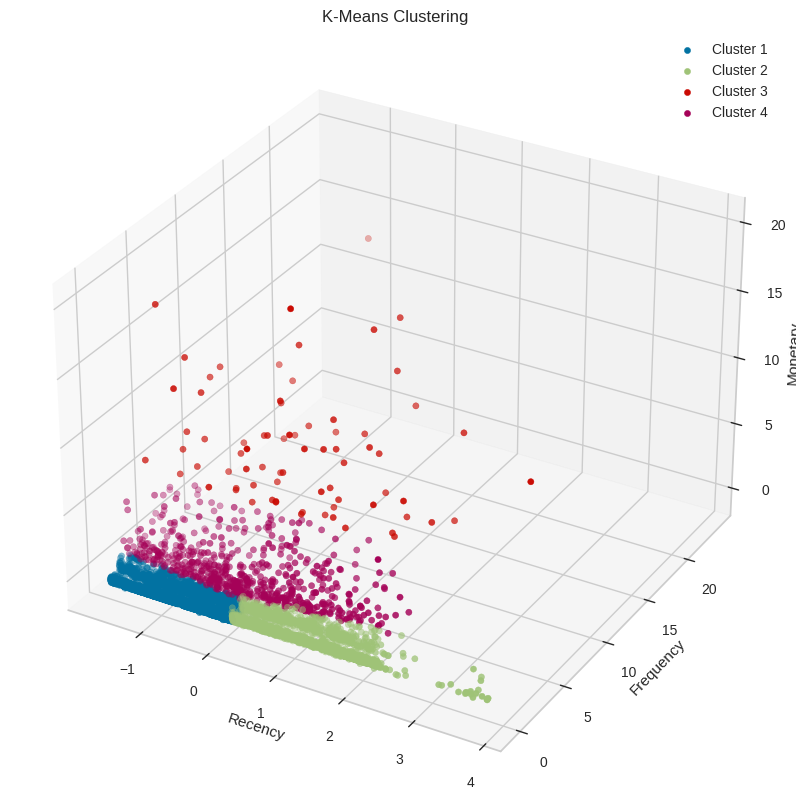

In [14]:
# Membuat figure
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Membuat scatter plot untuk setiap cluster
for i in range(max(labels)+1):
    filtered_label_i = rfm_scaled[labels == i]
    ax.scatter(filtered_label_i[:,0], filtered_label_i[:,1], filtered_label_i[:,2], label=label_mapping[i])

ax.set_title('K-Means Clustering')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.legend()
plt.savefig("cluster.png", format='png')
plt.show()


In [15]:
rfm_scaled = pd.DataFrame(rfm_scaled)
rfm_scaled.to_excel('rfm standarisasi.xlsx', index=False)

In [18]:
rfm_scaled['Cluster']=labels
clustered=rfm_scaled
clustered.to_excel('clustered.xlsx',index=False)